<a href="https://colab.research.google.com/github/sid-sank/Computational-Statistics/blob/main/Class_03_bootstrapping_permutation_randomization_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The new diabetes drug- Gluco-No-Mo!

Consider a new drug being tested for diabetes reversal. It's called _Gluco-No-Mo_. HbA1c (Hemoglobin A1c) measures the average blood sugar (glucose) over the past 2-3 months, showing the percentage of red blood cell's hemoglobin coated in sugar. A reduction in HbA1c is a sign improving outcome. Below are the outcomes measured as a reduction in HbA1c levels for the control and treatment groups.

In [2]:
import numpy as np

np.random.seed(1)

# HbA1c reduction (higher is better)
control = np.array([0.3, 0.4, 0.2, 0.1, 0.5, 0.3, 0.4, 0.2, 0.3, 0.1])
treatment = np.array([0.8, 0.7, 0.6, 0.9, 0.5, 0.7, 0.6, 0.8, 0.9, 0.7])

##Task 1
Calculate the observed in means between the control and treatment groups.

In [3]:
# Type your code here
print(np.mean(treatment) - np.mean(control))

0.43999999999999995


How confident are you that the difference you are seeing is actually because of the drug is effective? Can you estimate the confidence interval around this difference in means?

We can of course do it if we were allowed to repeat this experiment a large number of times. However, since we have limited resources and time, is there any other way to do this with a single sample dataset?

# Bootstrapping - _"How variable is my estimator?"_

Bootstrapping estimates the sampling distribution of a statistic by repeatedly resampling with replacement from the observed data. It is typically used for estimating standard errors, constructing confidence intervals and assessing bias of an estimator. To understand how bootstrapping works in more detail, take a look at [this video](https://www.youtube.com/watch?v=Xz0x-8-cgaQ).

### Assumptions in bootstrapping
* The observed sample approximates the population
* Resampling mimics repeated sampling from that population

Let's try bootstrapping the observed dataset to create a sampling distribution

The 97% confidence interval is 0.31999999999999995 to 0.56


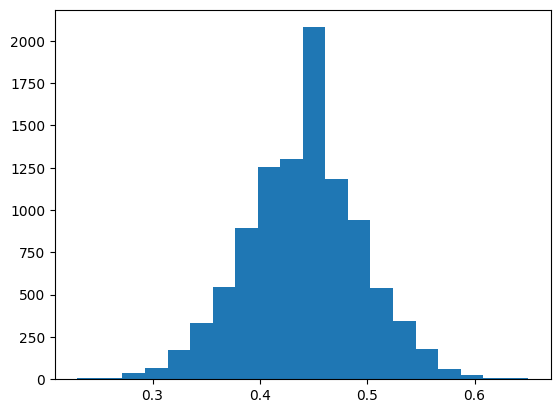

In [49]:
# Step 1 - Decide on the number of times you wish to bootstrap and
# create an array of that size to store the differences

np.random.seed(123)
B = 10000
bootstrapped_data = np.zeros(B)

# Step 2 - Create a loop to generate bootstrap samples for both control and
# treatment. Also record the mean difference for each iteration

for replicate in range(B):
  cont_vals = np.random.choice(control, size = 10, replace = True)
  treat_vals = np.random.choice(treatment, size = 10, replace = True)
  mean_diff = np.mean(treat_vals) - np.mean(cont_vals)
  bootstrapped_data[replicate] = mean_diff

# Step 3 - Plot the histogram of the mean differences

import matplotlib.pyplot as plt

plt.hist(bootstrapped_data, bins = 20)

# Step 4 - Estimate the 97% confidence interval

low = np.percentile(bootstrapped_data, 1.5)
high = np.percentile(bootstrapped_data, 98.5)
print(f"The 97% confidence interval is {low} to {high}")



## Homework
What happens when you bootstrap a very small dataset, let us say n=5?


# Randomization test _"Could random assignment alone produce this effect?"_

Suppose patients were randomly assigned to treatment or control in the study.

The reshuffling recreates the actual random assignment mechanism.

We want to know what is the probability of seeing a treatment effect this large purely due to random assignment, assuming no causal effect of the drug.

H₀:The diabetes drug has no effect.

H₁:The diabetes drug has an effect.

Redefine the study based on assignment of experimental units to Treatment and Control groups

In [32]:
# 0 = control, 1 = treatment ; treatment and control groups were assigned through randomization
assignment = np.array([0,1,1,0,0,0,1,0,1,1,1,1,0,1,0,1,0,1,0,0])

# HbA1c reduction
outcomes = np.array([
    0.3, 0.8, 0.7, 0.4, 0.2, 0.1, 0.6, 0.5, 0.9, 0.5, 0.7, 0.7, 0.3, 0.6, 0.4, 0.8, 0.2, 0.9, 0.3, 0.1])

p_val = 0.0


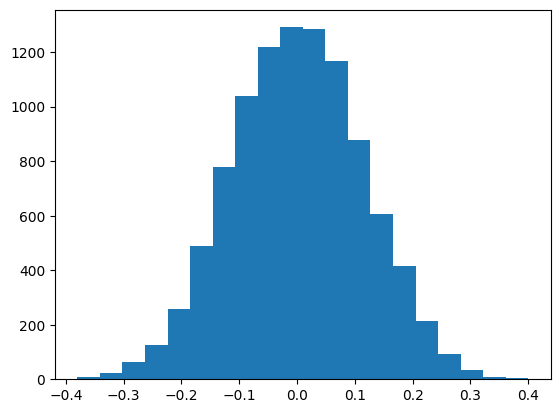

In [48]:
# Step 1 - Decide on the number of times you wish to permute the assignment and
# create an array of that size to store the mean differences

N = 10000
rand_test_data = np.zeros(N)
n = 20

# Step 2 - Create a loop to permute assignments to control and treatment.
# Also record the mean difference for each permutation

for i in range(N):
  perm = np.random.permutation(assignment)
  treat_mean = np.mean(outcomes[perm == 1])
  cont_mean = np.mean(outcomes[perm == 0])
  mean_diff = treat_mean - cont_mean
  rand_test_data[i] = mean_diff

# Step 3 - Plot the histogram of the mean differences

plt.hist(rand_test_data, bins = 20)

# Step 4 - Estimate the p-value

p_val = np.mean(abs(rand_test_data) > abs(0.44))
print(f"p_val = {p_val}")

## Homework
What happens when you do very few permutations, let us say B=10?


# Permutation test _"Could this difference arise by chance?"_

If the information about random assignment of treatment and control groups was not available to us, we could still follow the same steps and ask if the two groups are indeed different, or did the difference arise purely by chance. For a visual intuition of permutation take a look at this [explanation](https://www.jwilber.me/permutationtest/).

In essence:
* Permutation test: shuffle labels whenever you assume exchangeability. The shuffling is justified by an assumption.
* Randomization test: shuffle labels because they were randomized. The shuffling is justified by design.

_Therefore, all randomization tests are permutation tests, but not all permutation tests are randomization tests._

H₀: Treated and untreated patients have the **same** outcomes, i.e., the group labels are **irrelevant**.

H₁: Treated and untreated patients have **different** outcomes, i.e., the group labels are **relevant**.

# Summary

| Method        | What is resampled | Replacement | Goal            |
| ------------- | ----------------- | ----------- | --------------- |
| Bootstrap     | Data values       | With        | Estimation      |
| Permutation   | Labels            | Without     | Hypothesis test |
| Randomization | Assignments       | Without     | Causal test     |
